# Exercise 2 - Random Forests

*Author: Papagrigoriou Vasileios Savvas*

In [2]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

from tabulate import tabulate

import matplotlib.pyplot as plt
%matplotlib inline

# Decision Tree Model

Read data from csv

In [3]:
df = pd.read_csv('breast_cancer.csv')

In [235]:
# Drop the NaN columns and the id column
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Choose the columns

In [236]:
target_col=['diagnosis']
feature_cols=df.drop('diagnosis', axis=1).columns

Get the data from the columns

In [237]:
X=df[feature_cols]
y=df[target_col]

Split the data into train/test

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Get all the different combination using arrays

In [239]:
criterion=['gini', 'entropy','log_loss']
max_depth=[None,3,5]
min_samples_leaf=[1,5,10]
rs=0

* 1.Find the best model


* 2.Print all the models 

In [240]:
modelsDTC = []
best_tree={'accuracy':-1,"model":None}

for c in criterion:
    for md in max_depth:
        for msl in min_samples_leaf:
            dtc = DecisionTreeClassifier(criterion=c, max_depth=md, min_samples_leaf=msl, random_state=rs) 
            dtc.fit(X_train, y_train)
            
            # Predict on the test set
            y_pred = dtc.predict(X_test)
            
            # Calculate the accuracy
            accuracy = accuracy_score(y_test, y_pred)
            
            # Find the best model
            if accuracy>best_tree['accuracy']:
                best_tree={'accuracy':accuracy,"model":dtc}
            
            # Append the model into a list
            modelsDTC.append([dtc,c, md, msl, accuracy])

# Sort the model by accuracy
modelsDTC.sort(key=lambda x: x[4],reverse=True)

# Print the models
# The empty slots are None values
# modelToDisplay=modelsDTC[0:][0:][1:]
print(tabulate([(c, md, msl, accuracy) for (_, c, md, msl, accuracy) in modelsDTC], tablefmt='fancy_grid', headers=['Criterion', 'Max Depth', 'Min Samples Leaf', 'Accuracy']))

╒═════════════╤═════════════╤════════════════════╤════════════╕
│ Criterion   │   Max Depth │   Min Samples Leaf │   Accuracy │
╞═════════════╪═════════════╪════════════════════╪════════════╡
│ gini        │           3 │                  5 │   0.973684 │
├─────────────┼─────────────┼────────────────────┼────────────┤
│ gini        │             │                 10 │   0.964912 │
├─────────────┼─────────────┼────────────────────┼────────────┤
│ gini        │           3 │                  1 │   0.964912 │
├─────────────┼─────────────┼────────────────────┼────────────┤
│ gini        │           3 │                 10 │   0.964912 │
├─────────────┼─────────────┼────────────────────┼────────────┤
│ gini        │           5 │                 10 │   0.964912 │
├─────────────┼─────────────┼────────────────────┼────────────┤
│ gini        │             │                  5 │   0.947368 │
├─────────────┼─────────────┼────────────────────┼────────────┤
│ gini        │           5 │           

[Text(0.5, 0.875, 'x[27] <= 0.142\ngini = 0.462\nsamples = 455\nvalue = [290, 165]\nclass = Malignant'),
 Text(0.25, 0.625, 'x[23] <= 957.45\ngini = 0.146\nsamples = 303\nvalue = [279, 24]\nclass = Malignant'),
 Text(0.125, 0.375, 'x[22] <= 107.75\ngini = 0.073\nsamples = 288\nvalue = [277, 11]\nclass = Malignant'),
 Text(0.0625, 0.125, 'gini = 0.036\nsamples = 269\nvalue = [264, 5]\nclass = Malignant'),
 Text(0.1875, 0.125, 'gini = 0.432\nsamples = 19\nvalue = [13, 6]\nclass = Malignant'),
 Text(0.375, 0.375, 'x[29] <= 0.065\ngini = 0.231\nsamples = 15\nvalue = [2, 13]\nclass = Benign'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = Benign'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = Benign'),
 Text(0.75, 0.625, 'x[23] <= 729.55\ngini = 0.134\nsamples = 152\nvalue = [11, 141]\nclass = Benign'),
 Text(0.625, 0.375, 'x[4] <= 0.108\ngini = 0.49\nsamples = 14\nvalue = [8, 6]\nclass = Malignant'),
 Text(0.5625, 0.125, 'gini = 0.0\nsa

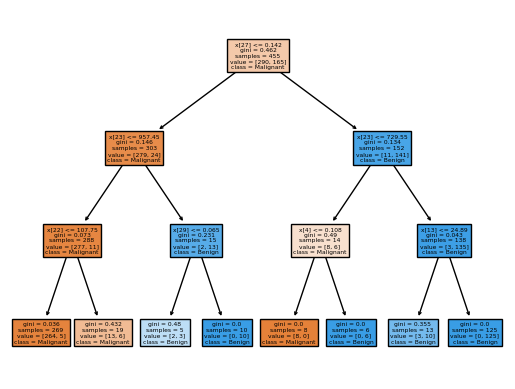

In [241]:
# Plot the tree of the best model
tree.plot_tree(best_tree['model'], filled=True, class_names=['Malignant', 'Benign'])

# Random Forest Classifier

In [242]:
n_estimators= [50, 100, 200]
criterion= ["gini", "entropy", "log_loss"]
min_samples_split= [2, 5, 10]
rs=0
modelsRFC=[]

In [ ]:
for ne in n_estimators:
    for c in criterion:
        for mss in min_samples_split:
            rfc = RandomForestClassifier(n_estimators=ne, criterion=c, min_samples_split=mss, random_state=rs) 
            rfc.fit(X_train, y_train)
            
            # Predict on the test set
            y_pred = rfc.predict(X_test)
            
            # Calculate the accuracy
            accuracy = accuracy_score(y_test, y_pred)
            
            # Append the model
            modelsRFC.append([rfc,ne, c, mss, accuracy])
            

In [244]:
# Sort the model by accuracy
modelsRFC.sort(key=lambda x: x[4],reverse=True)
# Print the models
print(tabulate([(ne, c, mss, accuracy) for (_, ne, c, mss, accuracy) in modelsRFC], tablefmt='fancy_grid', headers=['N_Estimators','Criterion','Min Samples Split','Accuracy']))

╒════════════════╤═════════════╤═════════════════════╤════════════╕
│   N_Estimators │ Criterion   │   Min Samples Split │   Accuracy │
╞════════════════╪═════════════╪═════════════════════╪════════════╡
│             50 │ gini        │                   2 │   0.973684 │
├────────────────┼─────────────┼─────────────────────┼────────────┤
│             50 │ gini        │                   5 │   0.973684 │
├────────────────┼─────────────┼─────────────────────┼────────────┤
│             50 │ entropy     │                   2 │   0.973684 │
├────────────────┼─────────────┼─────────────────────┼────────────┤
│             50 │ entropy     │                   5 │   0.973684 │
├────────────────┼─────────────┼─────────────────────┼────────────┤
│             50 │ entropy     │                  10 │   0.973684 │
├────────────────┼─────────────┼─────────────────────┼────────────┤
│             50 │ log_loss    │                   2 │   0.973684 │
├────────────────┼─────────────┼────────────────

# Random Forest Classifier

**Criterion** : Ο τρόπος με τον οποίο το δέντρο μετράει την ποιότητα των διαιρέσεων κατα την διάρκεια της κατασκευής του δέντρου.

**N_estimator** : Ο αριθμός των δέντρων σε ενα δάσος, δηλαδή πόσα δέντρα θα δημιουργηθούν για να παίρνουν αποφάσεις.

**min_samples_split** : Ο ελάχιστος αριθμός δειγμάτων που θα πρέπει να χρησιμοποιηθούν για να χωρίστει ένας κόμβος δηλαδή πόσα δείγματα θα πρέπει να υπάρχουν σε ένα κόμβο ώστε αυτός να διαιρεθεί.

# Decision Tree Classifier

**Criterion** :  Ο τρόπος με τον οποίο το δέντρο μετράει την ποιότητα των διαιρέσεων κατα την διάρκεια της κατασκευής του δέντρου.

**Max Depth** : Το μέγιστο βάθος που μπορεί να έχει ένα δέντρο.

**Min Samples Leaf** : Ο ελάχιστος αριθμός δειγμάτων που πρέπει να υπάρχουν σε ένα τερματικό κόμβο.

# Plot target bar

<Axes: xlabel='diagnosis'>

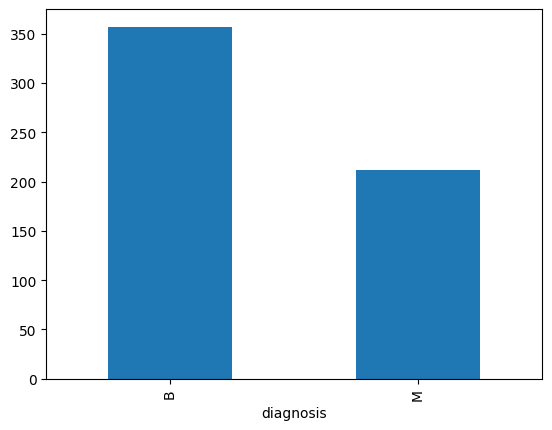

In [245]:
df['diagnosis'].value_counts().plot(kind='bar')

##### Τί παρατηρείτε για τα targets? 

Υπάρχουν περισσότεροι στόχοι που ανήκουν στην κατηγορία "Καλοήθη" από ό,τι στην κατηγορία "Κακοήθη".

##### Αν φτιάξω classifier ο οποίος θεωρεί (χωρίς καμία εκπαίδευση) ότι όλα τα παραδείγματα ολόκληρου του dataset είναι Malignant, τι ακρίβεια θα πετύχω? 

* Αν κάνουμε προβλέψεις χρησιμοποιώντας το Κακοήθη ως απάντηση για όλες τις περιπτώσεις, θα επιτύχουμε ακρίβεια **41.23%**.

* Αν κάνουμε προβλέψεις χρησιμοποιώντας το Καλοήθη ως απάντηση για όλες τις περιπτώσεις, θα επιτύχουμε ακρίβεια **58.77%**.

In [246]:
# Make a simplified prediction using M for all values
y_pred_simplified=['M' for y_test in y_test['diagnosis']]
# Calculate and print the accuracy 
print(f"Accuracy for Malignant: {accuracy_score(y_test, y_pred_simplified)}")

Accuracy for Malignant: 0.41228070175438597


##### Θεωρείτε ότι είναι καλά αυτά τα δεδομένα για την εκπαίδευση ενός classifier για αναγνώριση του καρκίνου? Αιτιολογείστε


* Πιστεύω πως 569 δεδομένα είναι λίγα για την εκπαίδευση οποιουδήποτε classifier

* Ακόμα βλέπουμε οτί υπάρχουν περισσότερα Καλοήθη δεδομένα, αυτό μπορεί να προκαλέσει λάθος προβλέψεις δίνοντας περισσότερες απαντήσεις ως Καλοήθη.


# 8 of the best Decision & Random Forest

##### The 8 best was all Random Forest so i will take 4 Decision Tree and 4 Random Forest

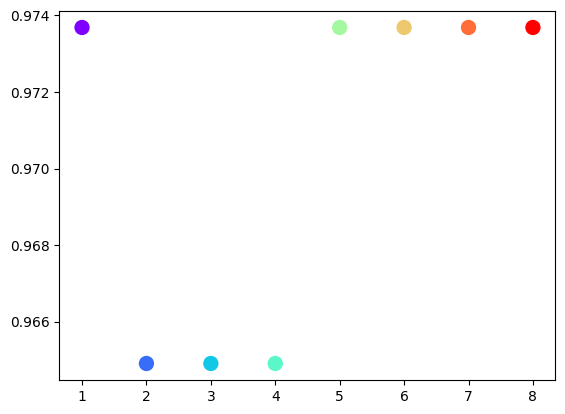

In [247]:
# Get the 8 best models, 4 each
bestmodels = [i for i in modelsDTC[:4]]
bestmodels.extend([ j for j in modelsRFC[:4]])

# get the id and accuracy of each model
id,accuracy = zip(*[(id+1, model[4]) for id, model in enumerate(bestmodels)])

# use different colors for each model
colors = plt.cm.rainbow(np.linspace(0, 1, len(id)))

# plot the scatter
plt.scatter(id,accuracy,c=colors,marker='o',s=100)

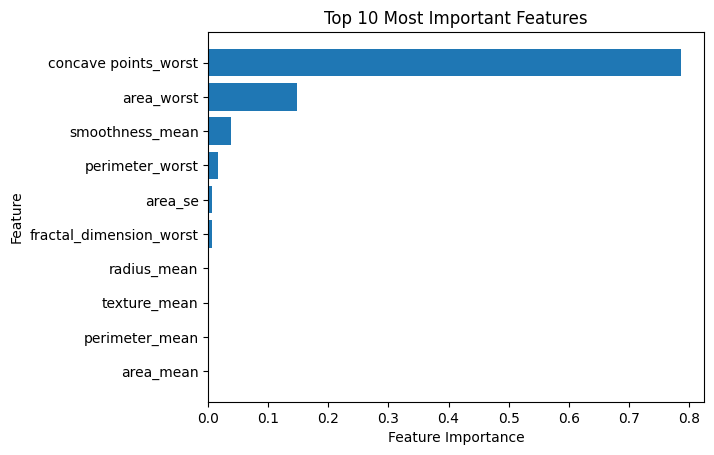

In [269]:
# get from the best model the best features
features=[]
for i,feature in enumerate(bestmodels[0][0].feature_importances_):
    features.append( [ feature , X.columns[i] ] )
    
# sort the features by importance
features.sort(key=lambda x: x[0],reverse=True)

# Get the top 10 features
top_feature_names = [feature[1] for feature in features[:10]]
top_feature_importances = [feature[0] for feature in features[:10]]

# plot the features
plt.barh(top_feature_names, top_feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title(f"Top 10 Most Important Features")

# invert to display the most important feature at the top
plt.gca().invert_yaxis() 

# show the plot
plt.show()

In [315]:
MalignantY = y_test[y_test['diagnosis']=='M'].sample(1)
BenignY  = y_test[y_test['diagnosis']=='B'].sample(1)

MalignantX= X_test.loc[MalignantY.index[0]]
BenignX= X_test.loc[BenignY.index[0]]

In [322]:
# Print the Malignant sample
print(f"Malignant sample: {MalignantY.index[0]}")
print(MalignantX)
print(f"Actual diagnosis: {MalignantY['diagnosis'].values[0]}")


Malignant sample: 213
radius_mean                  17.42000
texture_mean                 25.56000
perimeter_mean              114.50000
area_mean                   948.00000
smoothness_mean               0.10060
compactness_mean              0.11460
concavity_mean                0.16820
concave points_mean           0.06597
symmetry_mean                 0.13080
fractal_dimension_mean        0.05866
radius_se                     0.52960
texture_se                    1.66700
perimeter_se                  3.76700
area_se                      58.53000
smoothness_se                 0.03113
compactness_se                0.08555
concavity_se                  0.14380
concave points_se             0.03927
symmetry_se                   0.02175
fractal_dimension_se          0.01256
radius_worst                 18.07000
texture_worst                28.07000
perimeter_worst             120.40000
area_worst                 1021.00000
smoothness_worst              0.12430
compactness_worst           

In [323]:
# Print the Malignant sample
print(f"Benign sample: {BenignY.index[0]}")
print(BenignX)
print(f"Actual diagnosis: {BenignY['diagnosis'].values[0]}")


Benign sample: 175
radius_mean                  8.671000
texture_mean                14.450000
perimeter_mean              54.420000
area_mean                  227.200000
smoothness_mean              0.091380
compactness_mean             0.042760
concavity_mean               0.000000
concave points_mean          0.000000
symmetry_mean                0.172200
fractal_dimension_mean       0.067240
radius_se                    0.220400
texture_se                   0.787300
perimeter_se                 1.435000
area_se                     11.360000
smoothness_se                0.009172
compactness_se               0.008007
concavity_se                 0.000000
concave points_se            0.000000
symmetry_se                  0.027110
fractal_dimension_se         0.003399
radius_worst                 9.262000
texture_worst               17.040000
perimeter_worst             58.360000
area_worst                 259.200000
smoothness_worst             0.116200
compactness_worst            0.


| Feature               | Benign     | Malignant   |
|-----------------------|------------|-------------|
| Perimeter Worst       | 58.360000  | 120.40000   |
| Concave Points Worst  | 0.0000     | 0.10990     |
| Smoothness Mean       | 0.091380   | 0.10060     |
| Area Worst            | 259.200000 | 1021.00000  |


Μπορούμε να δούμε στο **Benign** οι τιμες είναι αρκετά χαμηλότερες σε σχέση με το **Malignant** 

Οπότε φυσικό είναι να ανήκουν στην συγκεκριμένη κλάση αντίστοιχα.

